In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from table_distance import distance_to_table_corners
from pillow_heif import register_heif_opener
from PIL import Image


<PIL.Image.Image image mode=L size=576x768 at 0x7FB607F1E3C0>
{'d_min': 0.180908203125, 'd_max': 0.53515625, 'representation_type': 1, 'disparity_reference_view': 0, 'nonlinear_representation_model_size': 0}


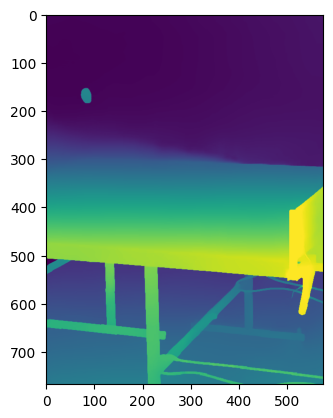

In [7]:
register_heif_opener()

im = Image.open("IMG_1836.heic")
if im.info["depth_images"]:
    depth_im = im.info["depth_images"][0]  # Access the first depth image (usually there will be only one).
    # Depth images are instances of `class HeifDepthImage(BaseImage)`,
    # so work with them as you would with any usual image in pillow_heif.
    # Depending on what you need the depth image for, you can convert it to a NumPy array or convert it to a Pillow image.
    pil_im = depth_im.to_pillow()
    np_im = np.asarray(depth_im)
    print(pil_im)
    print(pil_im.info["metadata"])
    
depth_arr = np.array(pil_im)
plt.imshow(depth_arr)


117
[[  2   2   2 ...  14  14  14]
 [  2   2   2 ...  14  14  14]
 [  2   2   2 ...  14  14  14]
 ...
 [104 104 104 ... 118 118 119]
 [104 104 104 ... 118 118 119]
 [105 105 105 ... 118 119 119]]


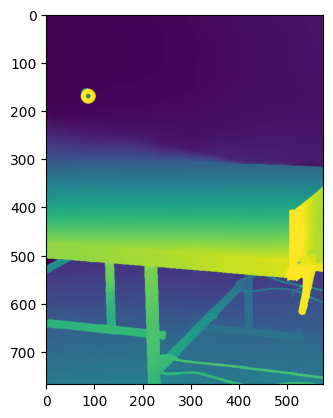

In [8]:
draw_image = np.array(pil_im).copy()
corner = (87, 170)
draw_image = cv2.circle(draw_image, corner, 10, (255, 255, 255), 10)
plt.imshow(draw_image)
print(depth_arr[corner[1]][corner[0]])
print(depth_arr)

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


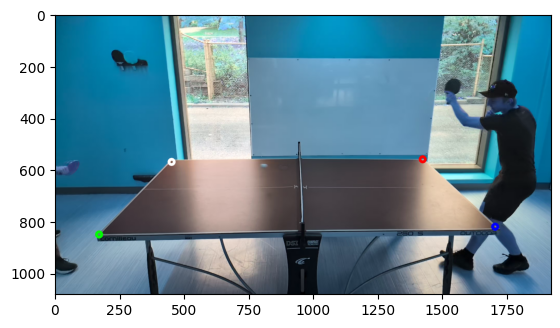

In [9]:

image = cv2.imread("./upstairs1_5.png")
# image = cv2.imread("./table_footage.jpg")
print(image.shape)
corners = [[450, 570], [1420, 560], [1700, 820], [170, 850]]
draw_image = image.copy()
colors = [(255, 255, 255), (255, 0, 0), (0, 0, 255), (0, 255, 0)]
for color, corner in zip(colors, corners):
    print(image.shape)
    draw_image = cv2.circle(draw_image, corner, 10, color, 10)
plt.imshow(draw_image)

(2268, 4032, 3)
(2268, 4032, 3)
(2268, 4032, 3)
(2268, 4032, 3)
(2268, 4032, 3)


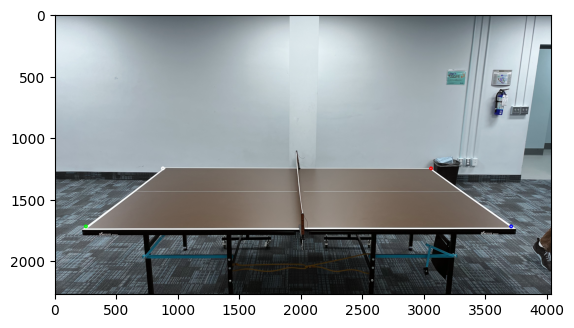

In [10]:
image = cv2.imread("./no_ball1.png")
# image = cv2.imread("./table_footage.jpg")
print(image.shape)
corners = [[875, 1250], [3050, 1250], [3700, 1720], [250, 1720]]
draw_image = image.copy()
colors = [(255, 255, 255), (255, 0, 0), (0, 0, 255), (0, 255, 0)]
for color, corner in zip(colors, corners):
    print(image.shape)
    draw_image = cv2.circle(draw_image, corner, 10, color, 10)
plt.imshow(draw_image)

(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)


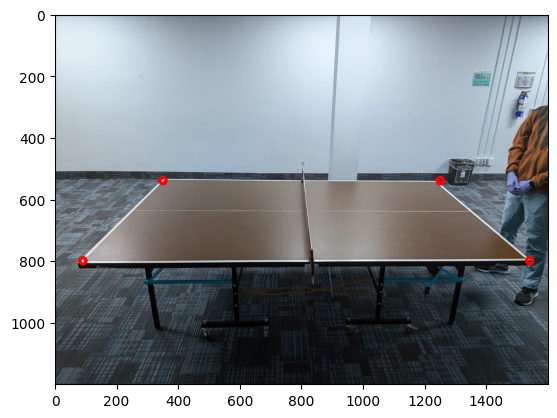

In [11]:
image = cv2.imread("./table_footage.jpg")
corners = [[350, 540], [1250, 540], [1540, 800], [90, 800]]
draw_image = image.copy()
for corner in corners:
    print(image.shape)
    draw_image = cv2.circle(draw_image, corner, 10, (255, 0, 0), 10)
plt.imshow(draw_image)

(338, 600, 3)
(338, 600, 3)


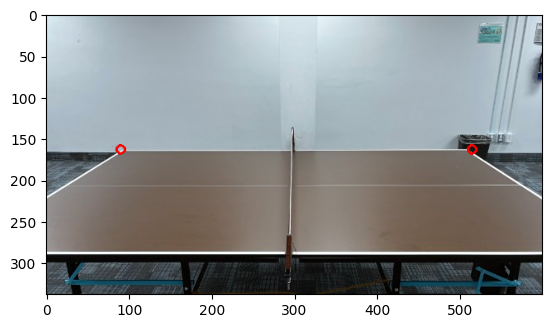

In [12]:
image = cv2.imread("./dist_test.jpeg")
corners = [[90, 163], [515, 163]]
draw_image = image.copy()
for corner in corners:
    print(image.shape)
    draw_image = cv2.circle(draw_image, corner, 5, (255, 0, 0), 2)
plt.imshow(draw_image)

(3000, 4000, 3)
(3000, 4000, 3)
(3000, 4000, 3)
(3000, 4000, 3)


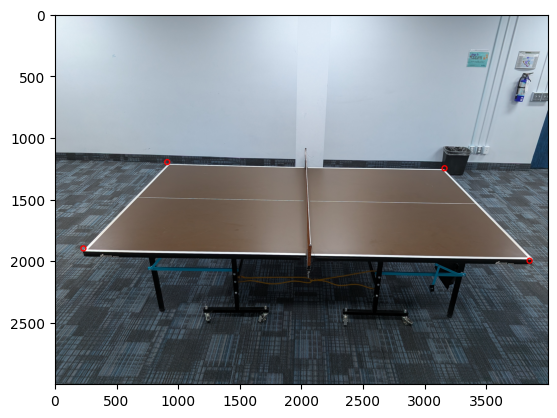

In [13]:
image = cv2.imread("./dist_test3.jpg")
corners = [[910, 1200], [3160, 1250], [3850, 2000], [230, 1900]]
draw_image = image.copy()
for corner in corners:
    print(image.shape)
    draw_image = cv2.circle(draw_image, corner, 20, (255, 0, 0), 10)
plt.imshow(draw_image)

In [14]:
corners[2], corners[3]

([3850, 2000], [230, 1900])

In [15]:
import math

# TRUE_LENGTH = 0.919
TRUE_LENGTH = 9
FOCAL_LENGTH = 2888

def calc_table_distance(left, right):
    length1 = math.sqrt((left[0] - right[0]) ** 2 + (left[1] - right[1]) ** 2)
    dist1 = FOCAL_LENGTH * TRUE_LENGTH / length1
    return dist1

In [16]:
calc_table_distance(corners[0], corners[1]), calc_table_distance(corners[2], corners[3])

(11.549148710310758, 7.177372484150865)

(720, 1280, 3)


{'TL': [320, 370], 'TR': [950, 370], 'BR': [1160, 510], 'BL': [125, 515]}

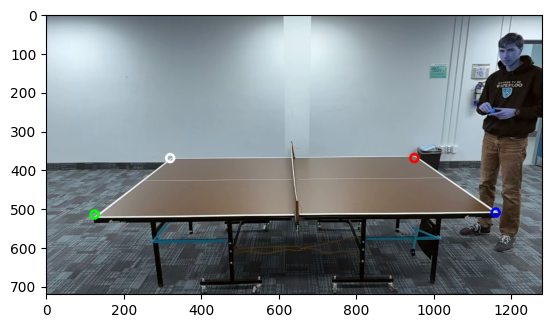

In [17]:
FOCAL_LENGTH = 1138
cap = cv2.VideoCapture("quat_video.mp4")
ret, image = cap.read()
corners = [[320, 370], [950, 370], [1160, 510], [125, 515]]
# corners = [[x, 720 - y] for x, y in corners]
draw_image = image.copy()
colors = [(255, 255, 255), (255, 0, 0), (0, 0, 255), (0, 255, 0)]
for color, corner in zip(colors, corners):
    draw_image = cv2.circle(draw_image, corner, 10, color, 5)
plt.imshow(draw_image)
print(image.shape)

corners = {"TL" : corners[0], "TR" : corners[1], "BR" : corners[2], "BL" : corners[3]}
corners

(1080, 1920, 3)


{'TL': [340, 450], 'TR': [1400, 470], 'BR': [0, 700], 'BL': [1750, 750]}

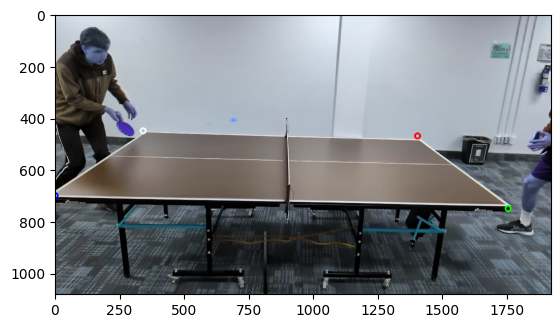

In [35]:
cap = cv2.VideoCapture("downstairs1.mp4")
ret, image = cap.read()
corners = [[340, 450], [1400, 470], [0, 700], [1750, 750]]
# corners = [[x, 720 - y] for x, y in corners]
draw_image = image.copy()
colors = [(255, 255, 255), (255, 0, 0), (0, 0, 255), (0, 255, 0)]
for color, corner in zip(colors, corners):
    draw_image = cv2.circle(draw_image, corner, 10, color, 5)
plt.imshow(draw_image)
print(image.shape)

corners = {"TL" : corners[0], "TR" : corners[1], "BR" : corners[2], "BL" : corners[3]}
corners

In [19]:
from scipy.spatial.transform import Rotation
q = [0.591797947883606, -0.15398257970809937, -0.1981748789548874, 0.7660230398178101]
print(Rotation.from_quat(q).as_euler('xyz', degrees=True))

[ 75.39644758  -0.07731691 -29.06926696]


In [20]:
distances = distance_to_table_corners(corners, FOCAL_LENGTH, image.shape[1], image.shape[0], phone_quaternion=q)
distances

TypeError: distance_to_table_corners() got an unexpected keyword argument 'phone_quaternion'

In [ ]:
FEET_PER_METER = 3.28084
print({key : distances[key] * FEET_PER_METER for key in distances})

{'TL': np.float64(11.322572286869473), 'TR': np.float64(11.440392266044546), 'BL': np.float64(3.135365877706397), 'BR': np.float64(3.5372943327736905)}
